# Задание 10. Нейросеть и классификация цифр

In [13]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import datasets

from sklearn.model_selection import train_test_split

from sklearn.neural_network import MLPClassifier

from sklearn.metrics import plot_confusion_matrix, accuracy_score, f1_score

from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

Изучите возможности классификации с помощью многослойного персептрона MLPClassifier.

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

Используя наборы данных с цифрами:

а) небольшой встроенный набор, загружаемый с помощью
X, y = datasets.load_digits(return_X_y=True)

https://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html#sphx-glr-auto-examples-datasets-plot-digits-last-image-py

In [14]:
X_digits, y_digits = datasets.load_digits(return_X_y=True)

In [15]:
display(X_digits[:10])
display(X_digits.shape)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

(1797, 64)

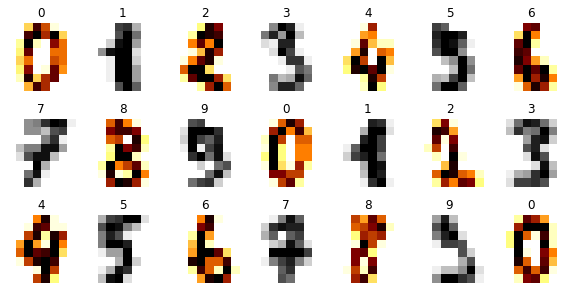

In [16]:
_, axes = plt.subplots(nrows=3, ncols=7, figsize=(10, 5))
for ax, image, label in zip(axes.flatten(), X_digits, y_digits):
    ax.set_axis_off()
    ax.imshow(image.reshape((8, 8)), cmap=plt.cm.gray_r if label % 2 else plt.cm.afmhot_r)
    ax.set_title(label)

б) MNIST, его можно загрузить по-разному, например, как в этом примере:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

http://yann.lecun.com/exdb/mnist/

https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mnist_filters.html#sphx-glr-auto-examples-neural-networks-plot-mnist-filters-py

In [17]:
X_mnist, y_mnist = datasets.fetch_openml('mnist_784', version=1, return_X_y=True)

In [18]:
display(X_mnist.head(10))
display(X_mnist.shape)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(70000, 784)

In [19]:
y_mnist

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

Так как тип y_mnist категориальный, конвертируем в целый.

In [20]:
y_mnist = y_mnist.astype(int)
y_mnist

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: int64

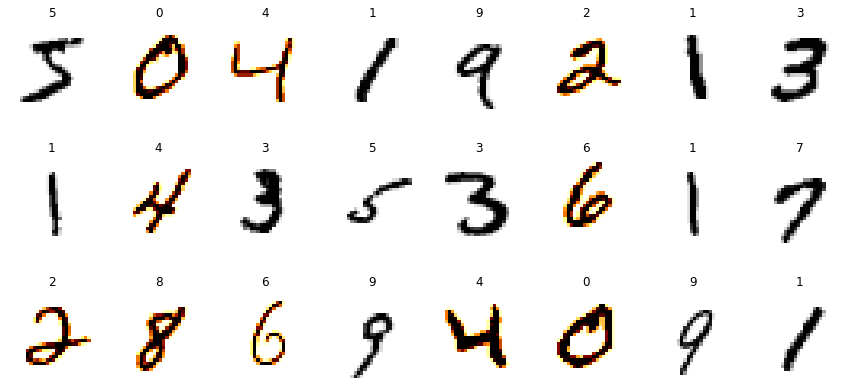

In [9]:
fig, axs = plt.subplots(3, 8, figsize=(15, 7))
im_size = int(np.sqrt(X_mnist.shape[1]))
for im_ctr in range(24):
    row_ctr = int(im_ctr / 8)
    col_ctr = im_ctr % 8
    image = np.reshape(np.array(X_mnist.iloc[im_ctr, :]), (im_size, im_size))
    axs[row_ctr, col_ctr].set_axis_off()
    axs[row_ctr, col_ctr].imshow(image, cmap=plt.cm.gray_r if y_mnist[im_ctr] % 2 else plt.cm.afmhot_r)
    axs[row_ctr, col_ctr].set_title(y_mnist[im_ctr])    
    # axs[row_ctr, col_ctr].set_xticks(ticks=[])
    # axs[row_ctr, col_ctr].set_yticks(ticks=[])

## 1) обучение и работу многоклассовой классификации,

### Посмотрим распределение по классам.

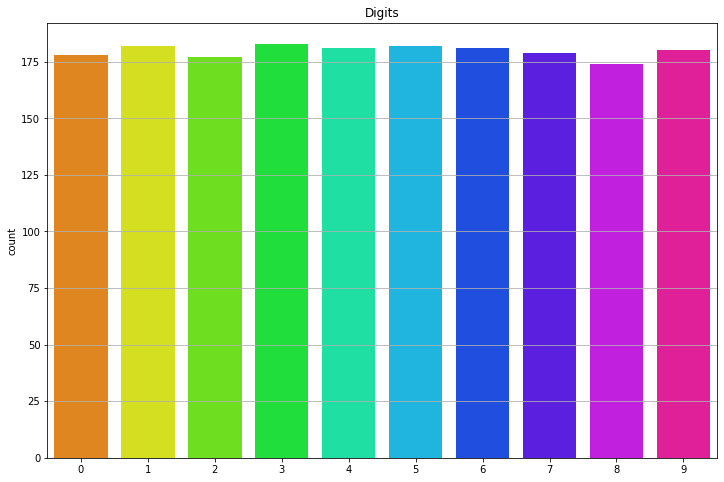

In [ ]:
_, ax_ = plt.subplots(figsize=(12, 8))
plt.grid(True)
plt.title('Digits')
sns.countplot(y_digits, palette='hsv');

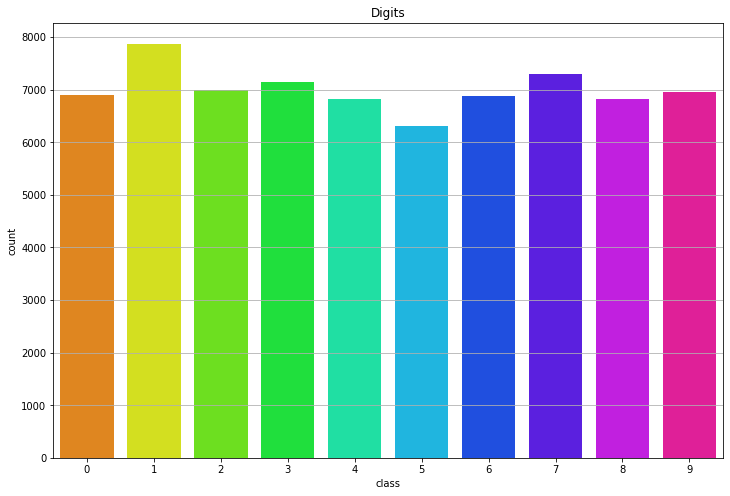

In [ ]:
_, ax_ = plt.subplots(figsize=(12, 8))
plt.grid(True)
plt.title('Digits')
sns.countplot(y_mnist, palette='hsv');

Так как количество объектов каждого класса целевой переменной не сильно отличается, можно использовать accuracy в качестве метрики.

### Классифицируем и оценим результаты.

Вспомогательная функция для обучения модели, отрисовки confusion matrix и подсчета оценок.

In [21]:
def fit_evaluate(clf, X_train, y_train, X_test, y_test, metric_=accuracy_score, figsize_=(10, 10)):
    clf.fit(X_train, y_train)
    _, axes = plt.subplots(figsize=figsize_)
    disp = plot_confusion_matrix(clf, X_test, y_test, normalize='true', ax=axes)
    disp.figure_.suptitle("Confusion Matrix")
    plt.show()
    
    return metric_(y_pred=clf.predict(X_train), y_true=y_train), \
           metric_(y_pred=clf.predict(X_test), y_true=y_test)

Датасет из sklearn

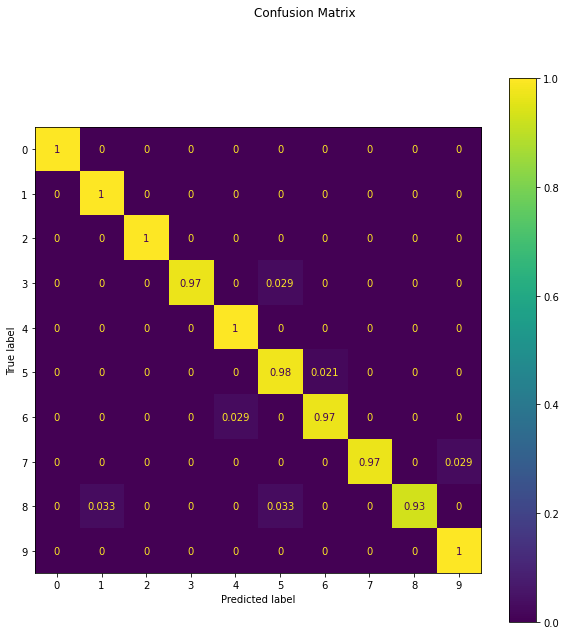

In [ ]:
X_digits_train, X_digits_test, y_digits_train, y_digits_test = train_test_split(X_digits, y_digits, test_size=0.2, shuffle=True, random_state=42)

mlp_clf = MLPClassifier(random_state=42)
digits_train_acc, digits_test_acc = fit_evaluate(mlp_clf, X_digits_train, y_digits_train, X_digits_test, y_digits_test)

In [ ]:
print(f'digits_train_acc = {digits_train_acc}, digits_test_acc = {digits_test_acc}')

digits_train_acc = 1.0, digits_test_acc = 0.9833333333333333


Датасет MNIST

*Выполняется 5-6 мин*

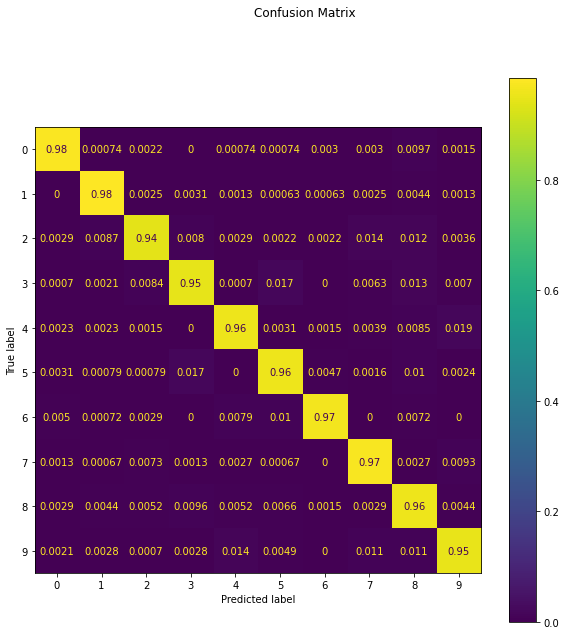

In [ ]:
X_mnist_train, X_mnist_test, y_mnist_train, y_mnist_test = train_test_split(X_mnist, y_mnist, test_size=0.2, shuffle=True, random_state=42)

mlp_clf = MLPClassifier(random_state=42)
mnist_train_acc, mnist_test_acc = fit_evaluate(mlp_clf, X_mnist_train, y_mnist_train, X_mnist_test, y_mnist_test)

In [ ]:
print(f'mnist_train_acc = {mnist_train_acc}, mnist_test_acc = {mnist_test_acc}')

mnist_train_acc = 0.9941071428571429, mnist_test_acc = 0.9620714285714286


## 2) бинарной классификации на чётные и нечётные цифры,

### Создадим новые классы и исследуем получившееся распределение.

Создадим новый целевой столбец c классами 1 для нечетных цифр и -1 для четных.

In [ ]:
y_digits_even_odd = (y_digits % 2) * 2 - 1
y_mnist_even_odd = (y_mnist % 2) * 2 - 1
display(y_digits_even_odd[:10])
display(y_mnist_even_odd[:10])

array([-1,  1, -1,  1, -1,  1, -1,  1, -1,  1])

0    1
1   -1
2   -1
3    1
4    1
5   -1
6    1
7    1
8    1
9   -1
Name: class, dtype: int64

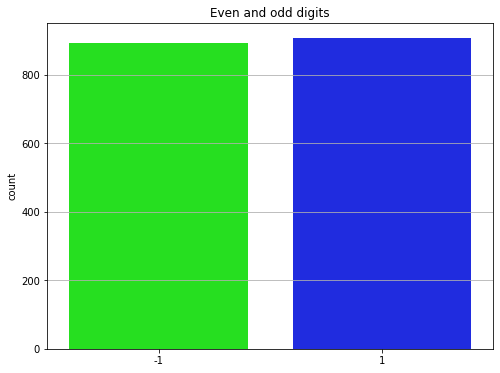

In [ ]:
_, ax_ = plt.subplots(figsize=(8, 6))
plt.grid(True)
plt.title('Even and odd digits')
sns.countplot(y_digits_even_odd, palette='hsv');

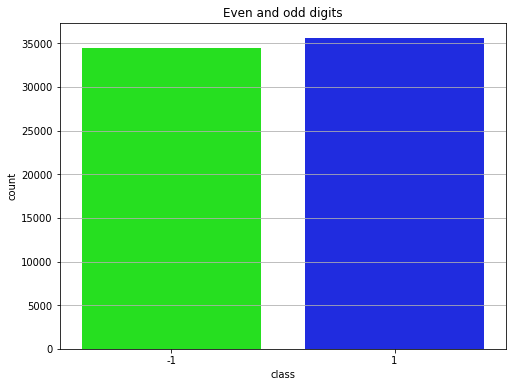

In [ ]:
_, ax_ = plt.subplots(figsize=(8, 6))
plt.grid(True)
plt.title('Even and odd digits')
sns.countplot(y_mnist_even_odd, palette='hsv');

Так как количество объектов каждого класса целевой переменной не сильно отличается, можно использовать accuracy в качестве метрики.

### Классифицируем и оценим результаты.

Датасет из sklearn

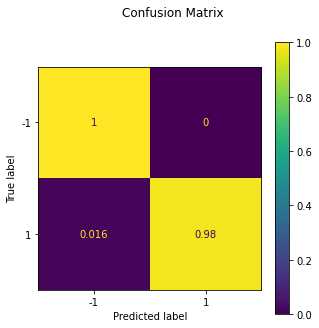

In [ ]:
X_digits_train, X_digits_test, y_digits_even_odd_train, y_digits_even_odd_test = \
train_test_split(X_digits, y_digits_even_odd, test_size=0.2, shuffle=True, random_state=42)

mlp_clf = MLPClassifier(random_state=42)
even_odd_digits_train_acc, even_odd_digits_test_acc = fit_evaluate(mlp_clf, \
X_digits_train, y_digits_even_odd_train, X_digits_test, y_digits_even_odd_test, figsize_=(5, 5))

In [ ]:
print(f'even_odd_digits_train_acc = {even_odd_digits_train_acc}, even_odd_digits_test_acc = {even_odd_digits_test_acc}')

even_odd_digits_train_acc = 1.0, even_odd_digits_test_acc = 0.9916666666666667


Датасет MNIST

*Выполняется 3-4 мин*

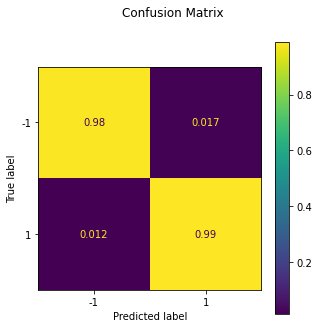

In [ ]:
X_mnist_train, X_mnist_test, y_mnist_even_odd_train, y_mnist_even_odd_test = \
train_test_split(X_mnist, y_mnist_even_odd, test_size=0.2, shuffle=True, random_state=42)

mlp_clf = MLPClassifier(random_state=42)
even_odd_mnist_train_acc, even_odd_mnist_test_acc = fit_evaluate(mlp_clf, \
X_mnist_train, y_mnist_even_odd_train, X_mnist_test, y_mnist_even_odd_test, figsize_=(5, 5))

In [ ]:
print(f'even_odd_mnist_train_acc = {even_odd_mnist_train_acc}, even_odd_mnist_test_acc = {even_odd_mnist_test_acc}')

even_odd_mnist_train_acc = 0.9989107142857143, even_odd_mnist_test_acc = 0.9852142857142857


## 3) бинарной классификации на '0' и остальные цифры (приведите примеры, когда классификатор ошибается),

### Создадим новые классы и исследуем получившееся распределение.

Создадим новый целевой столбец c классами 0 для 0 и 1 для всех остальных цифр.

In [ ]:
y_digits_zero_other = y_digits.copy()
y_digits_zero_other[y_digits_zero_other > 1] = 1
y_mnist_zero_other = y_mnist.copy()
y_mnist_zero_other[y_mnist_zero_other > 1] = 1
display(y_digits_zero_other[:10])
display(y_mnist_zero_other[:10])

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

0    1
1    0
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: class, dtype: int64

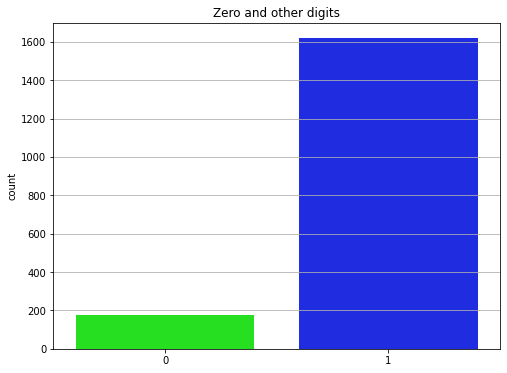

In [ ]:
_, ax_ = plt.subplots(figsize=(8, 6))
plt.grid(True)
plt.title('Zero and other digits')
sns.countplot(y_digits_zero_other, palette='hsv');

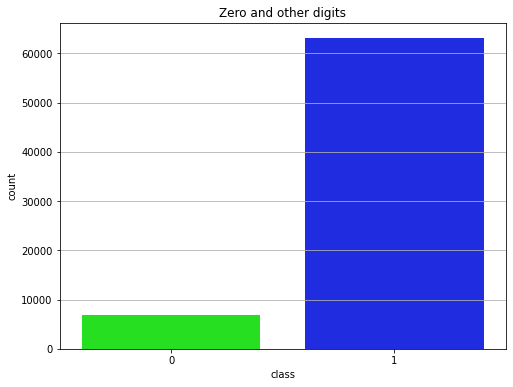

In [ ]:
_, ax_ = plt.subplots(figsize=(8, 6))
plt.grid(True)
plt.title('Zero and other digits')
sns.countplot(y_mnist_zero_other, palette='hsv');

Объектов класса 1 сильно больше, чем объектов класса 0. В качестве метрики возьмем f1_score.

### Классифицируем и оценим результаты.

Датасет из sklearn.

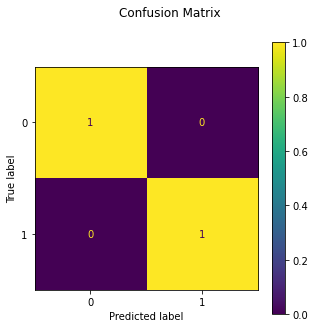

In [ ]:
X_digits_train, X_digits_test, y_digits_zero_other_train, y_digits_zero_other_test = \
train_test_split(X_digits, y_digits_zero_other, test_size=0.2, shuffle=True, random_state=42)

mlp_clf = MLPClassifier(random_state=42)
zero_other_digits_train_f1, zero_other_digits_test_f1 = fit_evaluate(mlp_clf, \
X_digits_train, y_digits_zero_other_train, X_digits_test, y_digits_zero_other_test, \
metric_=f1_score, figsize_=(5, 5))

In [ ]:
print(f'zero_other_digits_train_f1 = {zero_other_digits_train_f1}, zero_other_digits_test_acc = {zero_other_digits_test_f1}')

zero_other_digits_train_f1 = 1.0, zero_other_digits_test_acc = 1.0


Классификатор распознает без ошибок.

Датасет MNIST.

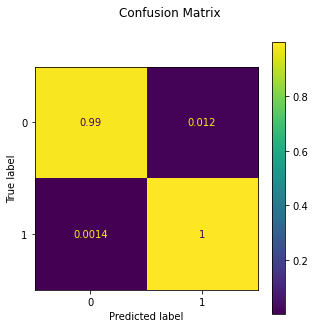

In [ ]:
X_mnist_train, X_mnist_test, y_mnist_zero_other_train, y_mnist_zero_other_test = \
train_test_split(X_mnist, y_mnist_zero_other, test_size=0.2, shuffle=True, random_state=42)

mlp_clf = MLPClassifier(random_state=42)
zero_other_mnist_train_f1, zero_other_mnist_test_f1 = fit_evaluate(mlp_clf, \
X_mnist_train, y_mnist_zero_other_train, X_mnist_test, y_mnist_zero_other_test, \
metric_=f1_score, figsize_=(5, 5))

In [ ]:
print(f'zero_other_mnist_train_f1 = {zero_other_mnist_train_f1}, zero_other_mnist_test_f1 = {zero_other_mnist_test_f1}')

zero_other_mnist_train_f1 = 0.999910784206822, zero_other_mnist_test_f1 = 0.9986567635903918


Классифицирует не всегда верно, посмотрим цифры, на которых классификатор ошибается.

Запустим классификатор заново.

In [ ]:
clf = MLPClassifier(random_state=42).fit(X_mnist_train, y_mnist_train)
y_mnist_pred = clf.predict(X_mnist_test)

Создадим список индексов цифр, на которых модель ошибается.

In [ ]:
y_mnist_comparison = y_mnist_pred == y_mnist_test
y_mnist_comparison = y_mnist_comparison[y_mnist_comparison == False].index
y_mnist_comparison

Int64Index([41416, 24656, 32129, 16981, 54778,  4510, 21445, 64224, 34444,
            47888,
            ...
             7215, 46288, 29335,  2622, 50371, 23730, 29538, 42566, 52089,
            62454],
           dtype='int64', length=531)

Отрисуем первые 40 из соответствующих цифр.

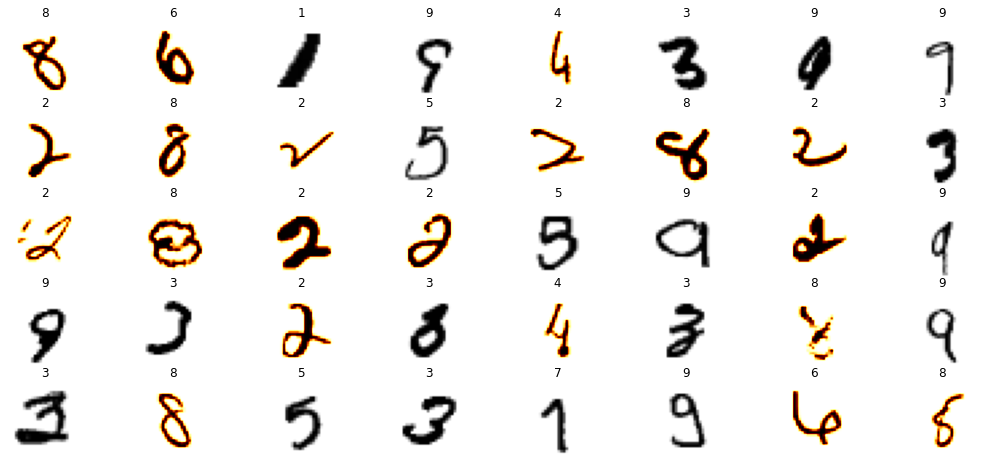

In [ ]:
fig, axs = plt.subplots(5, 8, figsize=(18, 8))
im_size = int(np.sqrt(X_mnist.shape[1]))
for im_ctr, cur_index in zip(range(40), y_mnist_comparison):
    row_ctr = int(im_ctr / 8)
    col_ctr = im_ctr % 8
    image = np.reshape(np.array(X_mnist.iloc[cur_index, :]), (im_size, im_size))
    axs[row_ctr, col_ctr].set_axis_off()
    axs[row_ctr, col_ctr].imshow(image, cmap=plt.cm.gray_r if y_mnist[cur_index] % 2 else plt.cm.afmhot_r)
    axs[row_ctr, col_ctr].set_title(y_mnist[cur_index]) 

## 4) проиллюстрируйте советы по использованию (например, для первого совета можно на маленьком наборе цифр сравнить результаты без нормализации, с использованием MinMaxScaler и с использованием StandardScaler).

https://scikit-learn.org/stable/modules/neural_networks_supervised.html#tips-on-practical-use

### Совет 1

Multi-layer Perceptron is sensitive to feature scaling, so it is highly recommended to scale your data. For example, scale each attribute on the input vector X to [0, 1] or [-1, +1], or standardize it to have mean 0 and variance 1. Note that you must apply the *same* scaling to the test set for meaningful results. You can use `StandardScaler` for standardization.

An alternative and recommended approach is to use `StandardScaler` in a `Pipeline`

Вспомогательная функция

In [ ]:
def fit_evaluate_comparison(clf, X_train, y_train, X_test, y_test, metric_=accuracy_score, figsize_=(18, 12)):
    accuracy_list = []
    _, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=figsize_)

    clf.fit(X_train, y_train)
    disp_1 = plot_confusion_matrix(clf, X_test, y_test, normalize='true', ax=ax1)
    ax1.set_title("Without scaling")
    accuracy_list.append(metric_(y_pred=clf.predict(X_test), y_true=y_test))

    pipe = Pipeline([('scaler', MinMaxScaler()), ('clf', MLPClassifier(random_state=42))])
    pipe.fit(X_train, y_train)
    disp_2 = plot_confusion_matrix(pipe, X_test, y_test, normalize='true', ax=ax2)
    ax2.set_title("MinMaxScaler")
    accuracy_list.append(metric_(y_pred=pipe.predict(X_test), y_true=y_test))

    pipe = Pipeline([('scaler', StandardScaler()), ('clf', MLPClassifier(random_state=42))])
    pipe.fit(X_train, y_train)
    disp_3 = plot_confusion_matrix(pipe, X_test, y_test, normalize='true', ax=ax3)
    ax3.set_title("StandardScaler")
    accuracy_list.append(metric_(y_pred=pipe.predict(X_test), y_true=y_test))

    plt.show()

    return accuracy_list

#### Для датасета из sklearn

Подсчет метрик и отрисовка матриц

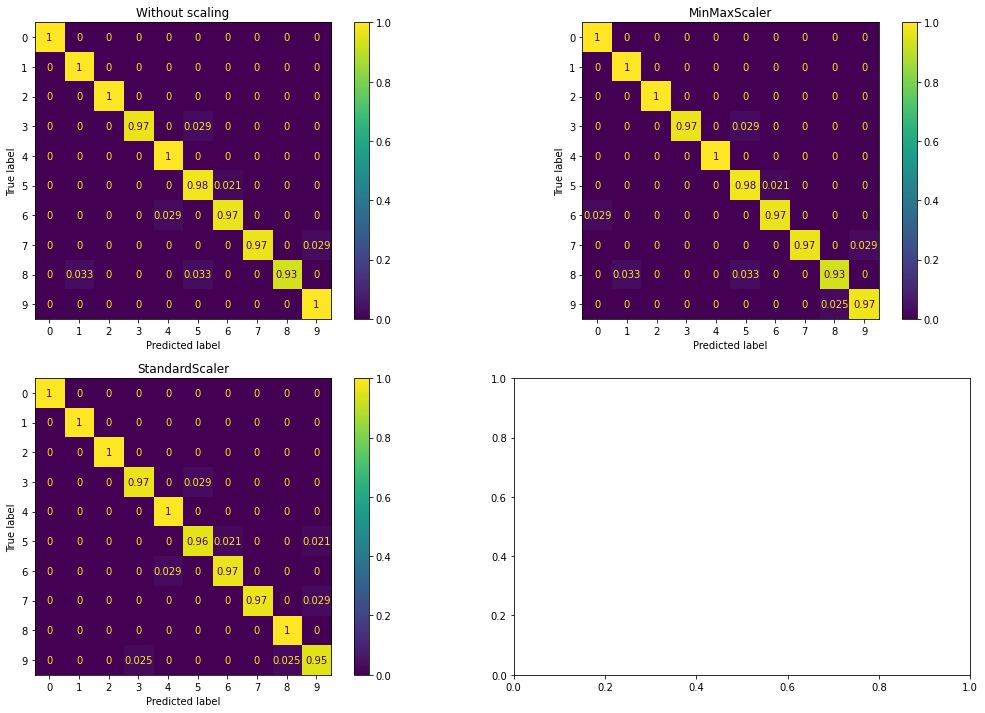

In [ ]:
X_digits_train, X_digits_test, y_digits_train, y_digits_test = train_test_split(X_digits, y_digits, test_size=0.2, shuffle=True, random_state=42)

mlp_clf = MLPClassifier(random_state=42)
digits_test_acc = fit_evaluate_comparison(mlp_clf, X_digits_train, y_digits_train, X_digits_test, y_digits_test)

Вывод зачений accuracy

In [ ]:
print(f'accuracy without scaling = {digits_test_acc[0]}')
print(f'accuracy MinMaxScaler = {digits_test_acc[1]}')
print(f'accuracy StandardScaler = {digits_test_acc[2]}')

accuracy without scaling = 0.9833333333333333
accuracy MinMaxScaler = 0.9805555555555555
accuracy StandardScaler = 0.9805555555555555


#### Для датасета MNIST

*Выполняется около 15 мин*

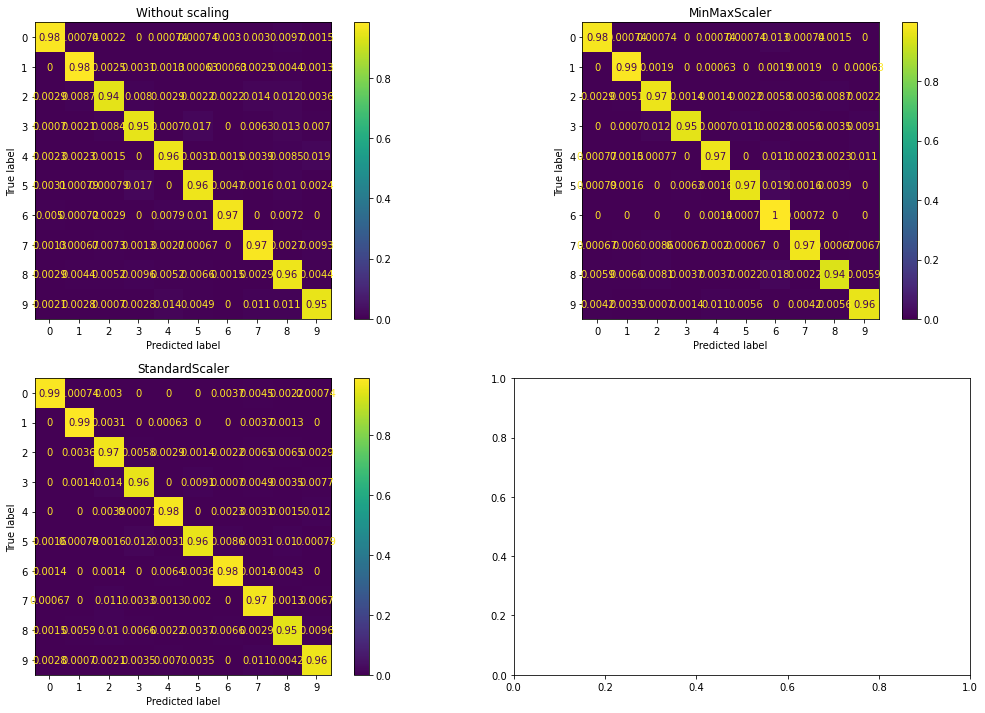

In [ ]:
X_mnist_train, X_mnist_test, y_dmnist_train, y_mnist_test = train_test_split(X_mnist, y_mnist, test_size=0.2, shuffle=True, random_state=42)

mlp_clf = MLPClassifier(random_state=42)
mnist_test_acc = fit_evaluate_comparison(mlp_clf, X_mnist_train, y_mnist_train, X_mnist_test, y_mnist_test)

In [ ]:
print(f'accuracy without scaling = {mnist_test_acc[0]}')
print(f'accuracy MinMaxScaler = {mnist_test_acc[1]}')
print(f'accuracy StandardScaler = {mnist_test_acc[2]}')

accuracy without scaling = 0.9620714285714286
accuracy MinMaxScaler = 0.9715
accuracy StandardScaler = 0.9712142857142857


### Совет 2

Finding a reasonable regularization parameter $\alpha$ is best done using `GridSearchCV`, usually in the range `10.0 ** -np.arange(1, 7)`.

Датасет из sklearn

In [ ]:
mlp_clf = MLPClassifier(random_state=42)
grid = {"alpha": 10.0 ** -np.arange(1, 7)}
gsc = GridSearchCV(mlp_clf, grid, cv=5, scoring='accuracy', refit=True)
gsc.fit(X_digits, y_digits)
print(f'gsc.best_score_ = {gsc.best_score_}')
print(f'gsc.best_params_ = {gsc.best_params_}')

gsc.best_score_ = 0.9421448467966573
gsc.best_params_ = {'alpha': 0.001}


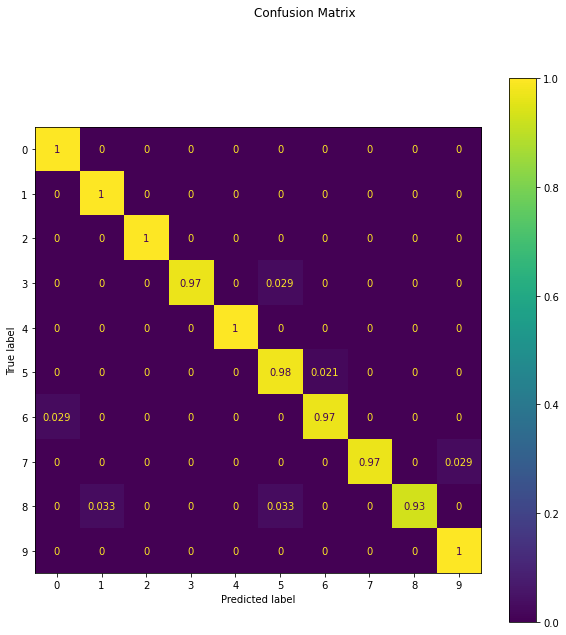

In [ ]:
X_digits_train, X_digits_test, y_digits_train, y_digits_test = train_test_split(X_digits, y_digits, test_size=0.2, shuffle=True, random_state=42)

mlp_clf = MLPClassifier(random_state=42, alpha=0.001)
digits_train_acc, digits_test_acc = fit_evaluate(mlp_clf, X_digits_train, y_digits_train, X_digits_test, y_digits_test)

In [ ]:
digits_test_acc

0.9833333333333333

Датасет MNIST

*1 час 12 мин 20 сек*

In [ ]:
mlp_clf = MLPClassifier(random_state=42)
grid = {"alpha": 10.0 ** -np.arange(1, 7)}
gsc = GridSearchCV(mlp_clf, grid, cv=3, scoring='accuracy', refit=True)
gsc.fit(X_mnist, y_mnist)
print(f'gsc.best_score_ = {gsc.best_score_}')
print(f'gsc.best_params_ = {gsc.best_params_}')

gsc.best_score_ = 0.9613571436576853
gsc.best_params_ = {'alpha': 0.0001}


Я, конечно, запущу это с параметром $\alpha = 0.0001$, но это то же самое, что было в начале - значение 0.0001 параметр принимает по умолчанию.

*7 мин 5 сек*

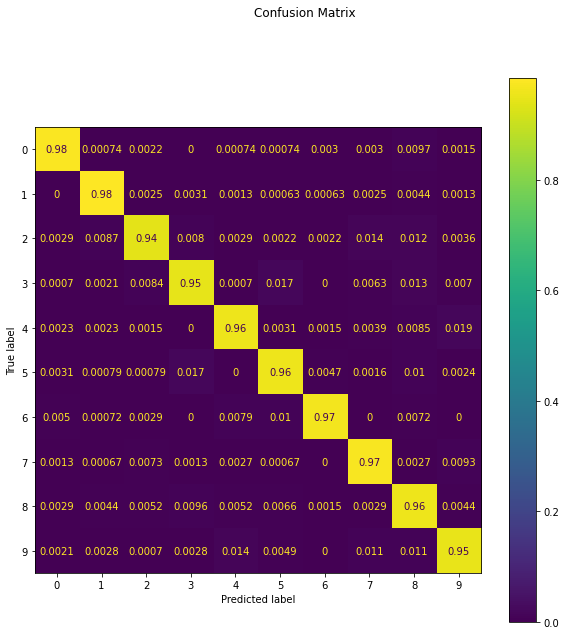

In [ ]:
X_mnist_train, X_mnist_test, y_mnist_train, y_mnist_test = train_test_split(X_mnist, y_mnist, test_size=0.2, shuffle=True, random_state=42)

mlp_clf = MLPClassifier(random_state=42, alpha=0.0001)
mnist_train_acc, mnist_test_acc = fit_evaluate(mlp_clf, X_mnist_train, y_mnist_train, X_mnist_test, y_mnist_test)

In [ ]:
mnist_test_acc

0.9620714285714286

### Совет 3

Empirically, we observed that `L-BFGS` converges faster and with better solutions on small datasets. For relatively large datasets, however, `Adam` is very robust. It usually converges quickly and gives pretty good performance. `SGD` with momentum or nesterov’s momentum, on the other hand, can perform better than those two algorithms if learning rate is correctly tuned.

Пробуем solver='adam'

Датасет из sklearn

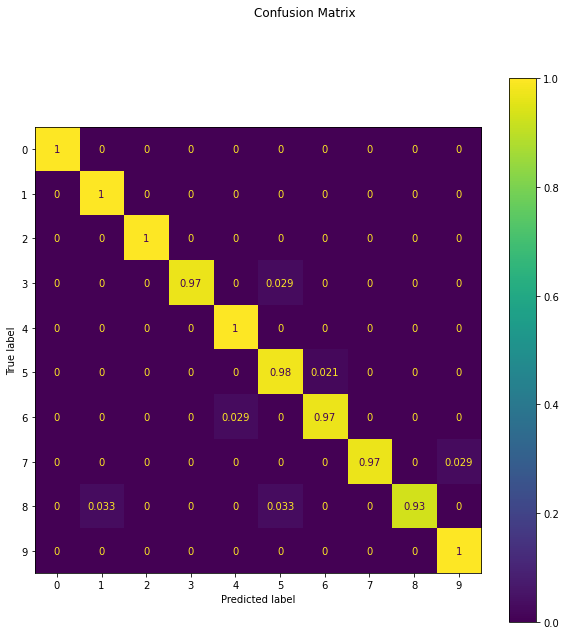

In [ ]:
X_digits_train, X_digits_test, y_digits_train, y_digits_test = train_test_split(X_digits, y_digits, test_size=0.2, shuffle=True, random_state=42)

mlp_clf = MLPClassifier(random_state=42, solver='adam')
digits_train_acc, digits_test_acc = fit_evaluate(mlp_clf, X_digits_train, y_digits_train, X_digits_test, y_digits_test)

In [ ]:
digits_test_acc

0.9833333333333333

Датасет MNIST

*7 мин 56 сек*

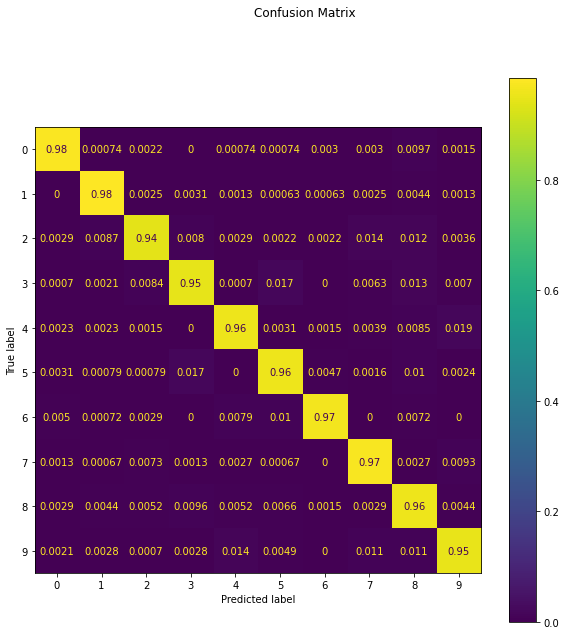

In [ ]:
X_mnist_train, X_mnist_test, y_mnist_train, y_mnist_test = train_test_split(X_mnist, y_mnist, test_size=0.2, shuffle=True, random_state=42)

mlp_clf = MLPClassifier(random_state=42, solver='adam')
mnist_train_acc, mnist_test_acc = fit_evaluate(mlp_clf, X_mnist_train, y_mnist_train, X_mnist_test, y_mnist_test)

In [ ]:
mnist_test_acc

0.9620714285714286

Подбираем параметры с solver='sgd'

Датасет из sklearn

*3 мин 44 сек*

In [23]:
mlp_clf = MLPClassifier(random_state=42, solver="sgd")
grid = {"learning_rate": ['constant', 'invscaling', 'adaptive'],
        # "solver": ["sgd"],
        "momentum": [0.1, 0.2, 0.5, 0.7, 0.9],
        "nesterovs_momentum": [True, False]}
gsc = GridSearchCV(mlp_clf, grid, cv=3, scoring='accuracy', refit=True)
gsc.fit(X_digits, y_digits)
print(f'gsc.best_score_ = {gsc.best_score_}')
print(f'gsc.best_params_ = {gsc.best_params_}')

gsc.best_score_ = 0.9337785197551475
gsc.best_params_ = {'learning_rate': 'constant', 'momentum': 0.9, 'nesterovs_momentum': False}


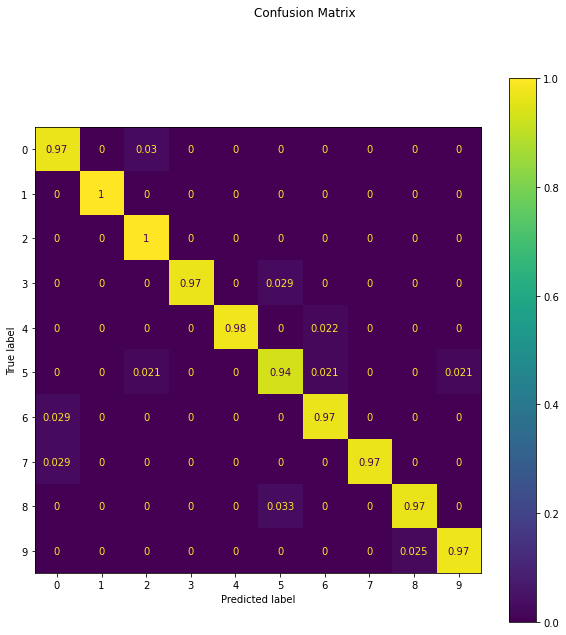

In [25]:
X_digits_train, X_digits_test, y_digits_train, y_digits_test = train_test_split(X_digits, y_digits, test_size=0.2, shuffle=True, random_state=42)

mlp_clf = MLPClassifier(random_state=42, solver="sgd", learning_rate="constant", momentum=0.9, nesterovs_momentum=False)
digits_train_acc, digits_test_acc = fit_evaluate(mlp_clf, X_digits_train, y_digits_train, X_digits_test, y_digits_test)

In [26]:
digits_test_acc

0.9722222222222222

Датасет MNIST

*55 мин 19 сек*

In [24]:
mlp_clf = MLPClassifier(random_state=42, solver="sgd")
grid = {"learning_rate": ['constant', 'invscaling', 'adaptive'],
        # "solver": ["sgd"],
        "momentum": [0.1, 0.5, 0.9],
        "nesterovs_momentum": [True, False]}
gsc = GridSearchCV(mlp_clf, grid, cv=3, scoring='roc_auc', refit=True)
gsc.fit(X_mnist[:10_000:], y_mnist[:10_000:])
print(f'gsc.best_score_ = {gsc.best_score_}')
print(f'gsc.best_params_ = {gsc.best_params_}')

gsc.best_score_ = nan
gsc.best_params_ = {'learning_rate': 'constant', 'momentum': 0.1, 'nesterovs_momentum': True}


*6 ч 7 мин 0 сек*

In [27]:
mlp_clf = MLPClassifier(random_state=42, solver="sgd")
grid = {"learning_rate": ['constant', 'invscaling', 'adaptive'],
        # "solver": ["sgd"],
        "momentum": [0.1, 0.5, 0.9],
        "nesterovs_momentum": [True, False]}
gsc = GridSearchCV(mlp_clf, grid, cv=3, scoring='accuracy', refit=True)
gsc.fit(X_mnist, y_mnist)
print(f'gsc.best_score_ = {gsc.best_score_}')
print(f'gsc.best_params_ = {gsc.best_params_}')

gsc.best_score_ = 0.9404286044650091
gsc.best_params_ = {'learning_rate': 'constant', 'momentum': 0.5, 'nesterovs_momentum': False}


*7 мин 0 сек*

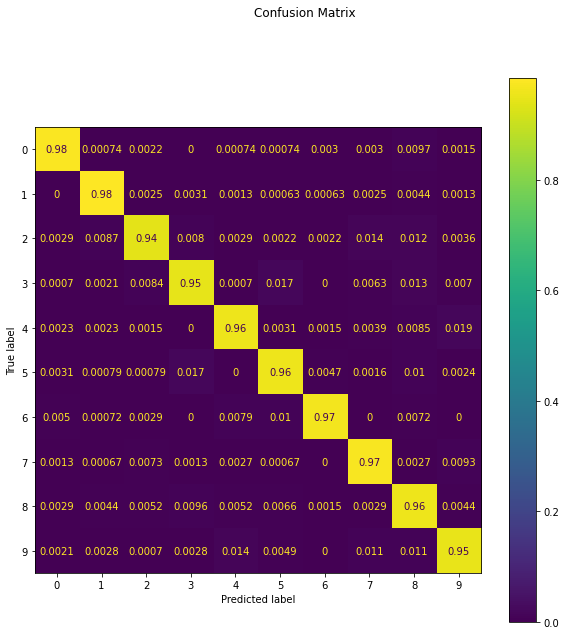

In [28]:
X_mnist_train, X_mnist_test, y_mnist_train, y_mnist_test = train_test_split(X_mnist, y_mnist, test_size=0.2, shuffle=True, random_state=42)

mlp_clf = MLPClassifier(random_state=42, learning_rate='constant', momentum=0.5, nesterovs_momentum=False)
mnist_train_acc, mnist_test_acc = fit_evaluate(mlp_clf, X_mnist_train, y_mnist_train, X_mnist_test, y_mnist_test)

In [29]:
mnist_test_acc

0.9620714285714286